In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("preco_notebooks.csv") 

### Explorando os dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   marca                896 non-null    object 
 1   modelo               896 non-null    object 
 2   marca_processador    896 non-null    object 
 3   nome_processador     896 non-null    object 
 4   geracao_processador  896 non-null    object 
 5   memoria              896 non-null    object 
 6   tipo_memoria         896 non-null    object 
 7   ssd                  896 non-null    object 
 8   hdd                  896 non-null    object 
 9   sistema_operacional  896 non-null    object 
 10  versao_so            896 non-null    object 
 11  placa_de_video       896 non-null    int64  
 12  peso                 896 non-null    object 
 13  polegadas            896 non-null    object 
 14  garantia             896 non-null    int64  
 15  Touchscreen          896 non-null    obj

In [4]:
df.head()

,marca,modelo,marca_processador,nome_processador,geracao_processador,memoria,tipo_memoria,ssd,hdd,sistema_operacional,...,polegadas,garantia,Touchscreen,msoffice,preco_atual,preco_anterior,desconto,notas_em_estrelas,qtd_avaliacoes,avaliacoes_unicas
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [5]:
#Verificando valores nulos
df.isna().any()

marca                  False
modelo                 False
marca_processador      False
nome_processador       False
geracao_processador    False
memoria                False
tipo_memoria           False
ssd                    False
hdd                    False
sistema_operacional    False
versao_so              False
placa_de_video         False
peso                   False
polegadas              False
garantia               False
Touchscreen            False
msoffice               False
preco_atual            False
preco_anterior         False
desconto               False
notas_em_estrelas      False
qtd_avaliacoes         False
avaliacoes_unicas      False
dtype: bool

In [6]:
# Verificando os tipos de variáveis 
df.dtypes

marca                   object
modelo                  object
marca_processador       object
nome_processador        object
geracao_processador     object
memoria                 object
tipo_memoria            object
ssd                     object
hdd                     object
sistema_operacional     object
versao_so               object
placa_de_video           int64
peso                    object
polegadas               object
garantia                 int64
Touchscreen             object
msoffice                object
preco_atual              int64
preco_anterior           int64
desconto                 int64
notas_em_estrelas      float64
qtd_avaliacoes           int64
avaliacoes_unicas        int64
dtype: object

In [7]:
# Convertendo coluna placa de video para texto 
df['placa_de_video'] = df.placa_de_video.astype(object)

In [8]:
# Verificando se a variável foi convertida 
df.dtypes.placa_de_video

dtype('O')

In [9]:
# Criando colunas com a converção para R$ (Real) cotação 0,063 na data 16/02/2023
df['preco_atual_real'] = df['preco_atual']*0.063
df['preco_anterior_real'] = df['preco_anterior']*0.063

In [10]:
df.head(2)

,marca,modelo,marca_processador,nome_processador,geracao_processador,memoria,tipo_memoria,ssd,hdd,sistema_operacional,...,Touchscreen,msoffice,preco_atual,preco_anterior,desconto,notas_em_estrelas,qtd_avaliacoes,avaliacoes_unicas,preco_atual_real,preco_anterior_real
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,No,No,24990,32790,23,3.7,63,12,1574.37,2065.770
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,No,No,19590,21325,8,3.6,1894,256,1234.17,1343.475


In [11]:
#Foi encontrado divergencia em categorias de memorias 
#Trazendo modelo de meorias para formato padrao 
df["tipo_memoria"]= df["tipo_memoria"].replace('LPDDR4X', "DDR4")
df["tipo_memoria"]= df["tipo_memoria"].replace('LPDDR4', "DDR4")
df["tipo_memoria"]= df["tipo_memoria"].replace('LPDDR3', "DDR3")

df["memoria"]= df["memoria"].replace('4 GB GB', "4GB")
df["memoria"]= df["memoria"].replace('8 GB GB', "8GB")
df["memoria"]= df["memoria"].replace('16 GB GB', "16GB")
df["memoria"]= df["memoria"].replace('32 GB GB', "32GB")

In [12]:
# Encontrado uma divergencia na marca de notebook

df["marca"]= df["marca"].replace('lenovo', "Lenovo")

In [13]:
# Verificando se a correção nos campos de memoria foi aplicada
df['tipo_memoria'].value_counts()

DDR4    862
DDR3     26
DDR5      8
Name: tipo_memoria, dtype: int64

In [14]:
# Verificando se a correção nos campos de memoria foi aplicada
df['memoria'].value_counts()

8GB     454
4GB     259
16GB    180
32GB      3
Name: memoria, dtype: int64

In [15]:
# Foi identificado alguns dados poluidos então optei por remover processadores em pequena 
# quantidade e com nomes divergentes  

In [16]:
# Lista manual com os processadores mais populares entre os notebooks e nomes corretos para filtragem 
processadores = ['Core i5','Core i3','Core i7','Ryzen 5','Ryzen 7',
                 'Ryzen 9','Ryzen 3','Celeron Dual','M1','Pentium Quad','Core i9']
processadores


['Core i5',
 'Core i3',
 'Core i7',
 'Ryzen 5',
 'Ryzen 7',
 'Ryzen 9',
 'Ryzen 3',
 'Celeron Dual',
 'M1',
 'Pentium Quad',
 'Core i9']

In [17]:
# Coluna verdadeiro x falso para filtragem de processadores 
filtro = df['nome_processador'].isin(processadores)
filtro

0      False
1      False
2      False
3      False
4      False
       ...  
891     True
892     True
893     True
894    False
895     True
Name: nome_processador, Length: 896, dtype: bool

In [18]:
# Dados de processadores foram subtituidos 
df = df[filtro]


In [19]:
df['placa_de_video'].head(5)

10    0
11    0
12    0
13    2
14    0
Name: placa_de_video, dtype: object

In [20]:
# Ajustando as informaçoes das placas de video para o formato padrão
df['placa_de_video'].replace(0, 'video integrado', inplace=True)
df['placa_de_video'].replace(2, '2 GB', inplace=True)
df['placa_de_video'].replace(4, '4 GB', inplace=True)
df['placa_de_video'].replace(6, '6 GB', inplace=True)
df['placa_de_video'].replace(8, '8 GB', inplace=True)

In [21]:
#Excluindo um outlaier da coluna ssd 
df = df.drop(df[df['ssd'] == '3072 GB'].index)
df['ssd'].value_counts()


512 GB     416
256 GB     193
0 GB       128
1024 GB    111
128 GB       8
2048 GB      2
Name: ssd, dtype: int64

In [22]:
df['hdd'].value_counts()


0 GB       652
1024 GB    160
512 GB      45
2048 GB      1
Name: hdd, dtype: int64

In [23]:
# Identificado o nootebook que nao tinha 'preco anterior real' com a 4th geração de processador
resultados = df[df['geracao_processador'].str.contains('4th')]
resultados

,marca,modelo,marca_processador,nome_processador,geracao_processador,memoria,tipo_memoria,ssd,hdd,sistema_operacional,...,Touchscreen,msoffice,preco_atual,preco_anterior,desconto,notas_em_estrelas,qtd_avaliacoes,avaliacoes_unicas,preco_atual_real,preco_anterior_real
463,Lenovo,B50-70,Intel,Core i5,4th,8GB,DDR3,0 GB,1024 GB,Windows,...,No,No,52490,0,0,3.8,78,17,3306.87,0.0


In [24]:
# Esta célula foi criada após perceber durante o processo de análise que
# aviam poucos notebooks de alta performance com valores muito acima da média 
# então foram excluídos para minimizar os outliers

df = df.drop(df[df['preco_anterior_real'] >=12000 ].index)
df = df.drop(df[df['preco_atual_real'] >=10000 ].index)
df.describe()

,garantia,preco_atual,preco_anterior,desconto,notas_em_estrelas,qtd_avaliacoes,avaliacoes_unicas,preco_atual_real,preco_anterior_real
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.714286,67794.889441,80747.819876,19.021118,3.001242,360.368944,44.688199,4271.078035,5087.112652
std,0.596722,28329.260013,38727.133737,10.375454,1.949543,1112.969503,135.216230,1784.743381,2439.809425
min,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,881.370000,0.000000
25%,0.000000,44990.000000,55534.000000,12.000000,0.000000,0.000000,0.000000,2834.370000,3498.642000
50%,1.000000,60990.000000,76090.000000,20.000000,4.100000,21.000000,3.000000,3842.370000,4793.670000
75%,1.000000,82990.000000,104990.000000,26.000000,4.400000,184.000000,24.000000,5228.370000,6614.370000
max,3.000000,155411.000000,189990.000000,57.000000,5.000000,15279.000000,1947.000000,9790.893000,11969.370000


### Percepção do preço através de funcionalidades (Memória, Processador, armazenamento e Placa de video) 

#### Dados por tipo e capacidade de memória

<AxesSubplot: xlabel='memoria'>

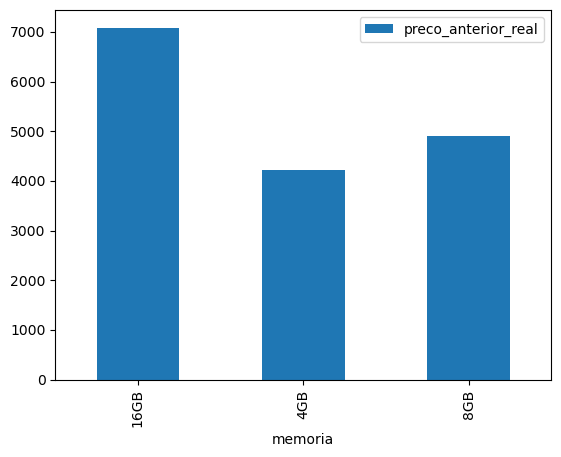

In [25]:
# Média preço por capacidade de memoria
mem = df.groupby('memoria')
mem[['tipo_memoria','preco_anterior_real']].mean().plot.bar()


In [26]:
mem = df.groupby('memoria')
mem[['tipo_memoria','preco_anterior_real']].mean().round(2)

,preco_anterior_real
memoria,
16GB,7086.72
4GB,4217.71
8GB,4895.46


<AxesSubplot: xlabel='tipo_memoria'>

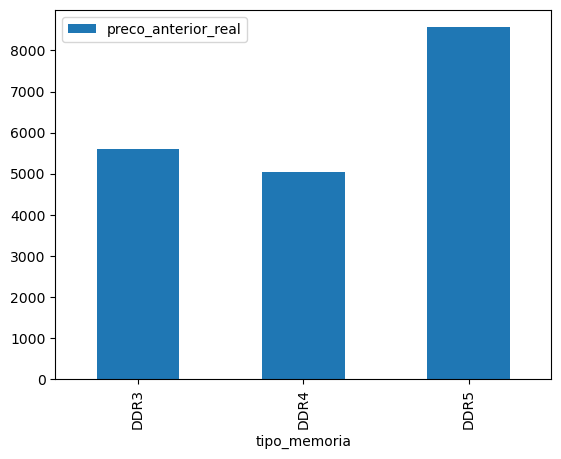

In [27]:
# Media de preco por modelo de memoria 
mem = df.groupby('tipo_memoria')
mem[['tipo_memoria','preco_anterior_real']].mean().plot.bar()

 Notebooks com memória DDR3 custam em média 11% a mais que os notebooks com memória DDR4. 
 
 Notebook com memoria DDR4 custam em média 42% a menos que notebooks com memória DDR5

In [28]:
# Media de preco por modelo de memoria 
mem = df.groupby('tipo_memoria')
mem[['tipo_memoria','preco_anterior_real']].mean().round(2)

,preco_anterior_real
tipo_memoria,
DDR3,5612.98
DDR4,5047.61
DDR5,8556.96


<AxesSubplot: xlabel='memoria'>

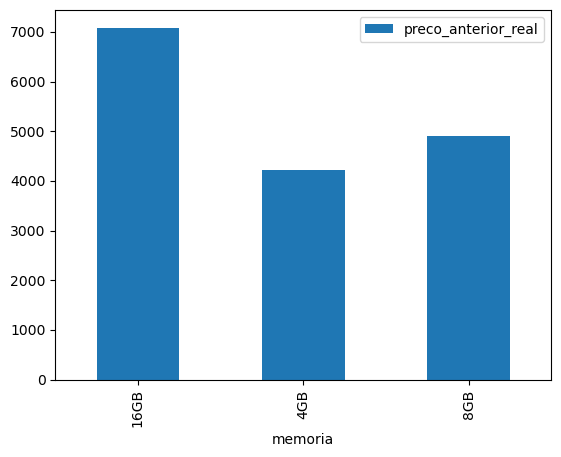

In [29]:
# Media de preco por capacidade de memoria 
mem = df.groupby('memoria')
mem[['memoria','preco_anterior_real']].mean().plot.bar()

 Notebooks com 4 GB de memória custam em média 14% a menos que os notebooks de 8GB.

Notebooks com 8 GB de memória custam em média 31% a menos que os notebooks de 16GB.




16GB         AxesSubplot(0.1,0.559091;0.363636x0.340909)
4GB     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
8GB              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

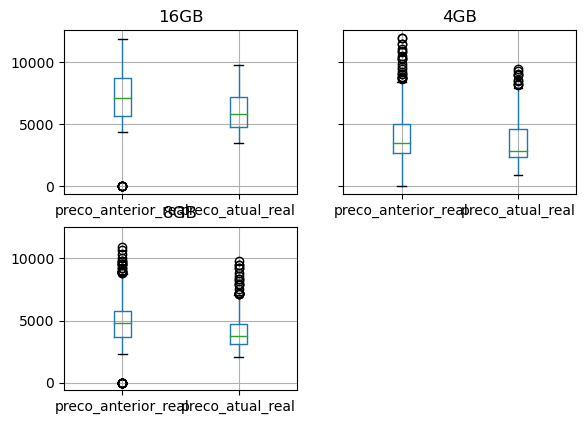

In [30]:
# Análisando outliers e medias de preço por capacidade de memoria
mem = df.groupby('memoria')
mem[['memoria','preco_anterior_real','preco_atual_real']].boxplot()

In [31]:
# Media de preco por capacidade de memoria 
mem = df.groupby('memoria')
mem[['memoria', 'preco_anterior_real', 'preco_atual_real']].mean().round(2)

,preco_anterior_real,preco_atual_real
memoria,,
16GB,7086.72,5976.37
4GB,4217.71,3581.18
8GB,4895.46,4081.27


A remoção de notebooks de alta performance trouxe novos outliers, mas aparentemente são irrelevantes 


Os outliers do grupo de memória DDR4 se deve ao modelo de processador empregado 
e ao SSD de alta capacidade de armazenamento como podemos identificar abaixo 

In [51]:

memoria_outlier = (df['memoria'] == '4GB') & (df['preco_anterior_real'] >= 10000)
linha = df.loc[memoria_outlier]
linha.head(20)

,marca,modelo,marca_processador,nome_processador,geracao_processador,memoria,tipo_memoria,ssd,hdd,sistema_operacional,...,Touchscreen,msoffice,preco_atual,preco_anterior,desconto,notas_em_estrelas,qtd_avaliacoes,avaliacoes_unicas,preco_atual_real,preco_anterior_real
856,Lenovo,Legion,AMD,Ryzen 7,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,No,Yes,130990,181890,27,0.0,0,0,8252.37,11459.070
861,ASUS,ROG,AMD,Ryzen 7,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,Yes,No,99990,162990,38,4.4,77,15,6299.37,10268.370
874,MSI,Delta,AMD,Ryzen 9,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,No,No,146990,188990,22,0.0,0,0,9260.37,11906.370
876,ASUS,ROG,AMD,Ryzen 9,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,Yes,No,114990,181990,36,4.7,14,1,7244.37,11465.370
877,ASUS,ROG,AMD,Ryzen 9,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,Yes,Yes,124990,175990,28,5.0,3,0,7874.37,11087.370
878,ASUS,Zenbook,AMD,Ryzen 9,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,Yes,No,134990,170990,21,0.0,0,0,8504.37,10772.370
879,HP,OMEN,AMD,Ryzen 9,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,No,Yes,141990,163739,13,0.0,0,0,8945.37,10315.557
880,ASUS,Rog,AMD,Ryzen 9,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,No,No,129990,166990,22,0.0,0,0,8189.37,10520.370
884,ASUS,ROG,AMD,Ryzen 9,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,No,No,141990,189990,25,4.2,61,13,8945.37,11969.370
886,ASUS,VivoBook,AMD,Ryzen 9,Missing,4GB,DDR4,1024 GB,0 GB,Windows,...,No,No,130500,162990,19,0.0,0,0,8221.50,10268.370


<AxesSubplot: >

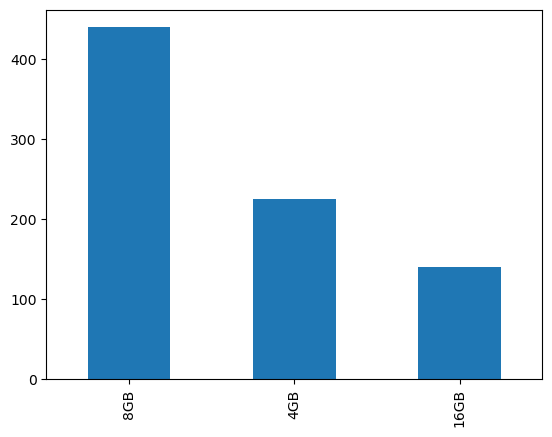

In [33]:
# Quantidade de notebooks pela capacidade de memoria 
df['memoria'].value_counts().plot.bar()

<AxesSubplot: >

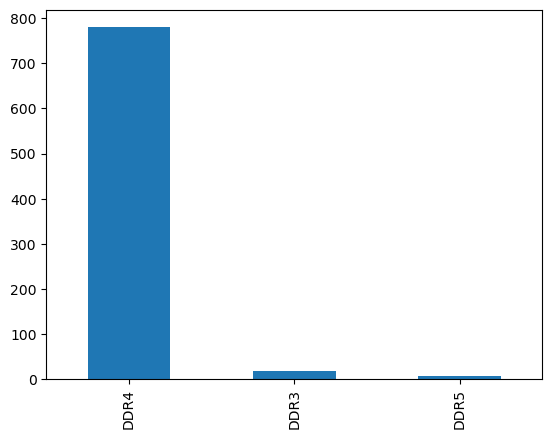

In [34]:
# Quantidade de notebooks pelo tipo da memoria 
df['tipo_memoria'].value_counts().plot.bar()

Notebooks com memória DDR4 predominam entre os modelos. 

<AxesSubplot: >

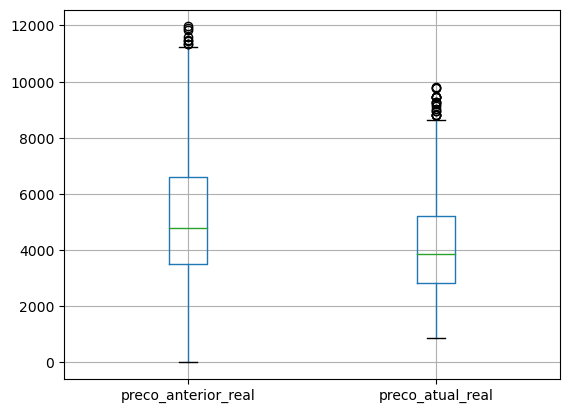

In [35]:
# Procurando outliers 
df.boxplot(['preco_anterior_real', 'preco_atual_real'])

Aparentemente os valores estão corretos, os notebooks mais caros são de alta performance. Assim podemos chegar a conclusão que não ha valores incorretos, mas uma gama de notebooks abrangente. Notebooks com maior valor foram removidos no inicio da analise.

### Dados por processador

<AxesSubplot: >

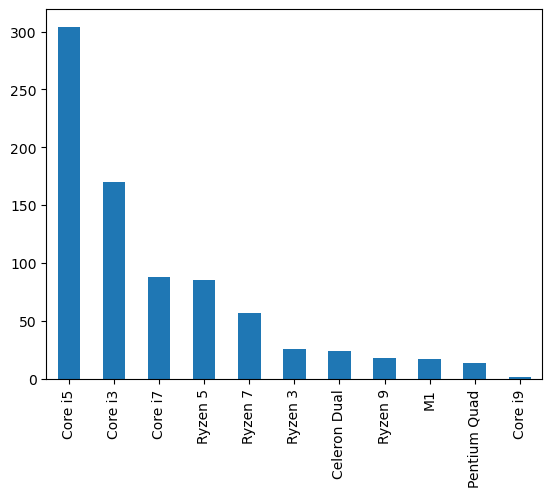

In [36]:
# Quantidade de notebooks por modelo de processador 
df['nome_processador'].value_counts().plot.bar()

<AxesSubplot: xlabel='nome_processador'>

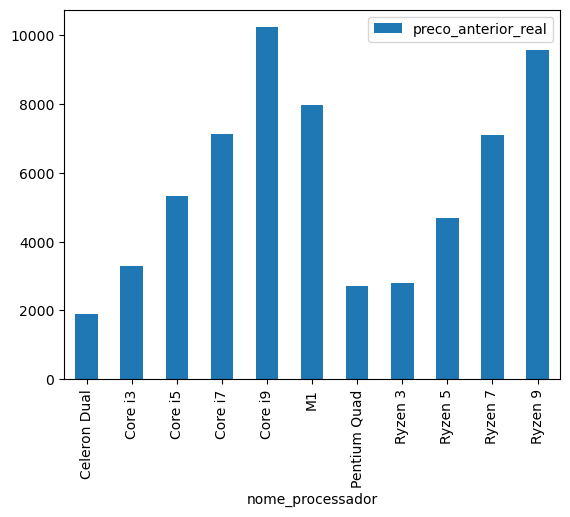

In [37]:
# Media de preço por modelo do processador 
proc = df.groupby('nome_processador')
proc[['nome_processador','preco_anterior_real']].mean().plot.bar()

<AxesSubplot: xlabel='nome_processador'>

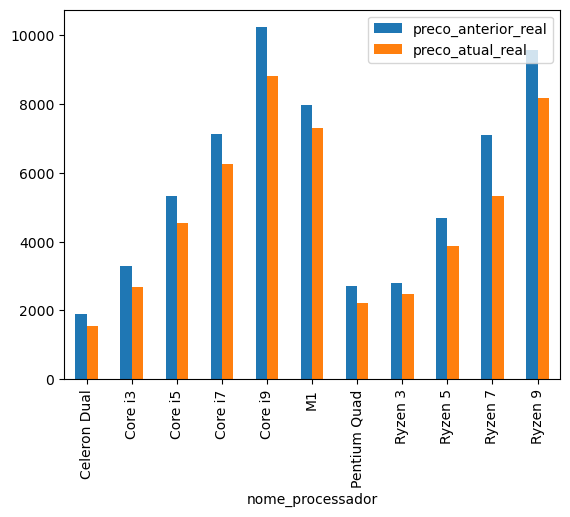

In [38]:
# Media de preço por modelo do processador antes e depois do desconto
proc = df.groupby('nome_processador')
proc[['nome_processador','preco_anterior_real', 'preco_atual_real']].mean().round(2).plot.bar()

Processadores M1, Core i9 e Ryzen 9 lideram os topos de preço por serem processadores mais potentes.

#### Geração de processadores

<AxesSubplot: >

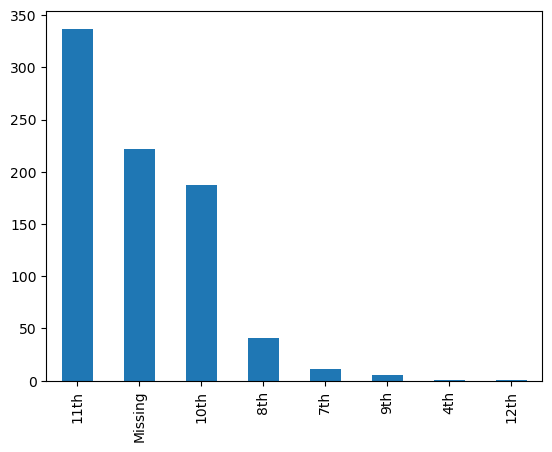

In [39]:
# Quantidade de notebooks por geração do processador 
df['geracao_processador'].value_counts().plot.bar()

<AxesSubplot: xlabel='geracao_processador'>

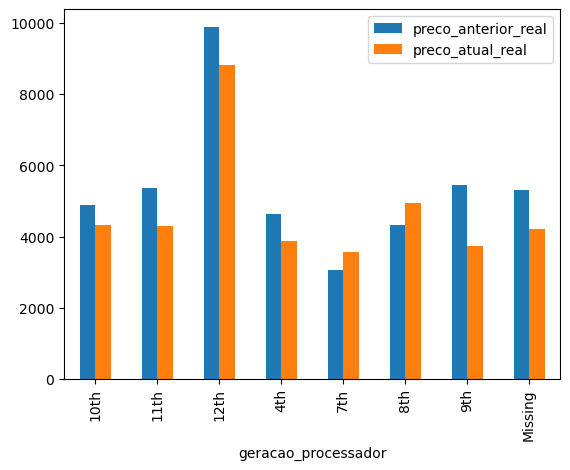

In [59]:
# Media de preço por geração do processador antes e depois do desconto e ou promoção
proc = df.groupby('geracao_processador')
proc[['geracao_processador','preco_anterior_real', 'preco_atual_real']].mean().round(2).plot.bar()

In [40]:
# Tendado identificar a quantidade e os processadores incluidos na coluna "Missing"
ger = df[df['geracao_processador'] == 'Missing']
ger.count()
#.head(3)

marca                  222
modelo                 222
marca_processador      222
nome_processador       222
geracao_processador    222
memoria                222
tipo_memoria           222
ssd                    222
hdd                    222
sistema_operacional    222
versao_so              222
placa_de_video         222
peso                   222
polegadas              222
garantia               222
Touchscreen            222
msoffice               222
preco_atual            222
preco_anterior         222
desconto               222
notas_em_estrelas      222
qtd_avaliacoes         222
avaliacoes_unicas      222
preco_atual_real       222
preco_anterior_real    222
dtype: int64

In [57]:
# Substituindo alguns valores "Missing" da coluna geração_do_processador
# baseada na coluna nome_do_processador
df['geracao_processador'] = pd.np.where(df['nome_processador'] == 'Ryzen 5', '4th', df['geracao_processador'])
ger = df[df['geracao_processador'] == 'Missing']
#ger.count()
#ger.head(1)

 Mesmo alterando valores 'Missing' para '4th' onde os processadores eram 
 'Ryzen 5' o volume não identificado continua grande. Porem,
 Os valores até o momento imputados não possuem confiabilidade pois é necessário
 mais informaçoes dos processadores além de 'Nome' e 'Marca' para definir a geração.
 Portanto nao sera levado em consideração analises baseada na geração do processador

### Dados por marca

<AxesSubplot: xlabel='marca'>

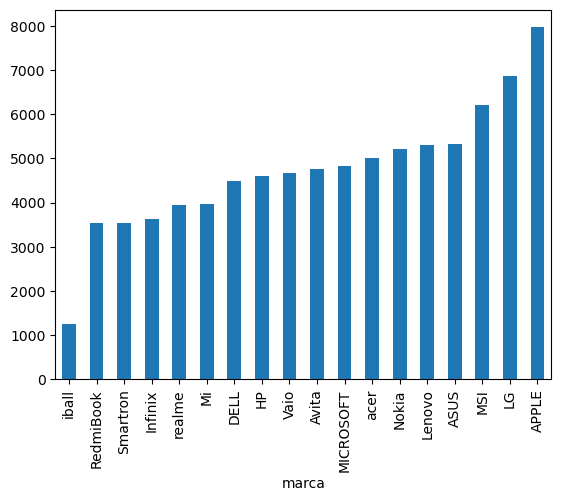

In [44]:
# Grafico com preço médio por marca
df.groupby(['marca']).preco_anterior_real.mean().sort_values().plot(kind='bar')

<AxesSubplot: xlabel='marca'>

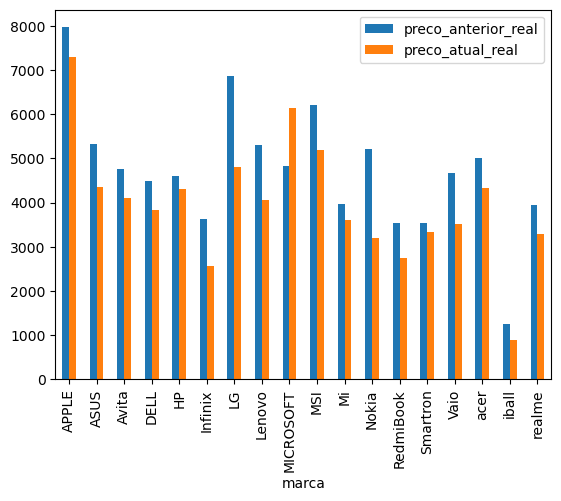

In [45]:
# Media de preço por marca antes e depois do desconto 
proc = df.groupby('marca')
proc[['geracao_processador','preco_anterior_real', 'preco_atual_real']].mean().round(2).plot.bar()

### Dados por placa de video

<AxesSubplot: xlabel='placa_de_video'>

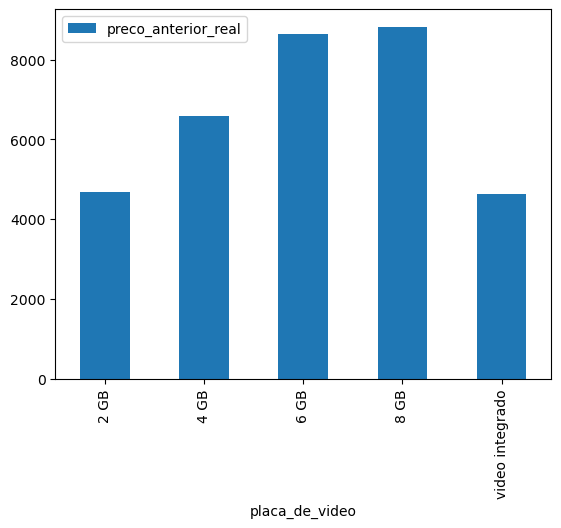

In [60]:
# Média de preço por placa de video
proc = df.groupby('placa_de_video')
proc[['placa_de_video','preco_anterior_real']].mean().plot.bar()


Notebooks sem placa de video custam em média R$4629.00. 1% a menos que notebooks com placas de video de 2GB
(Neste caso fatores como modelo e capacidade de memória armazenamento e processador podem estar influenciado)

Notebooks com placa de video de 4GB custam em média R$6583.00 29% a mais que notebooks com placas de video de 2GB

Notebooks com placa de video de 6GB custam em média R$8650.00 24% a mais que notebooks com placas de video de 4GB

Notebooks com placa de video de 8GB custam em média R$8815.00 2% a mais que notebooks com placas de video de 6GB 


In [90]:
# Média de preço por placa de video
pvideo = df.groupby('placa_de_video')
pvideo[['placa_de_video','preco_anterior_real', 'preco_atual_real']].mean().round(2)

,preco_anterior_real,preco_atual_real
placa_de_video,,
2 GB,4671.75,4633.27
4 GB,6583.12,5248.25
6 GB,8650.79,7463.99
8 GB,8815.56,6724.62
video integrado,4629.19,3857.88


<AxesSubplot: >

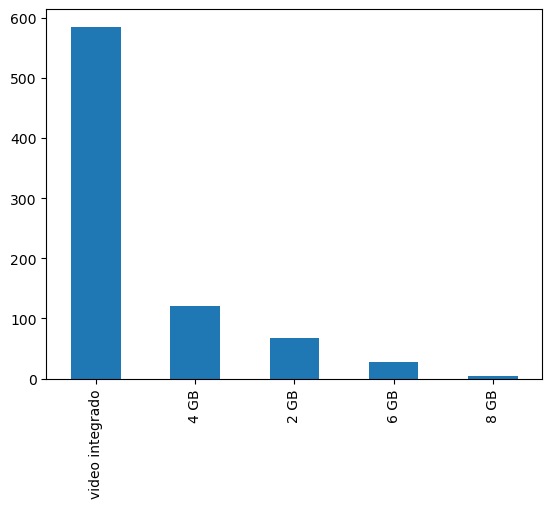

In [69]:
# Quantidade de Notebooks por placa de video
df['placa_de_video'].value_counts().plot.bar()

<AxesSubplot: >

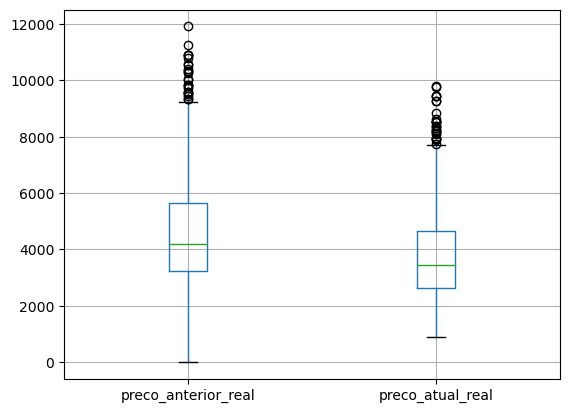

In [89]:
# Boxplot notebooks sem placa de video (video integrado)
video_integrado = df[df['placa_de_video'] == 'video integrado']
video_integrado.boxplot(['preco_anterior_real', 'preco_atual_real'])

Alguns notebooks nao possuem valor na coluna "preco_anterior_real" apena "preco_atual" por 
isso o boxplot apresenta valor minimo em 0 

<AxesSubplot: >

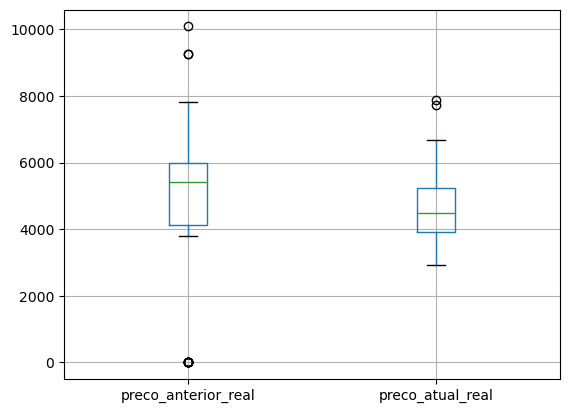

In [91]:
# Boxplot notebooks placa de video 2 GB
video_2GB = df[df['placa_de_video'] == '2 GB']
video_2GB.boxplot(['preco_anterior_real', 'preco_atual_real'])

Alguns notebooks nao possuem valor na coluna "preco_anterior_real" apena "preco_atual" por 
isso o boxplot apresenta valor minimo em 0 

<AxesSubplot: >

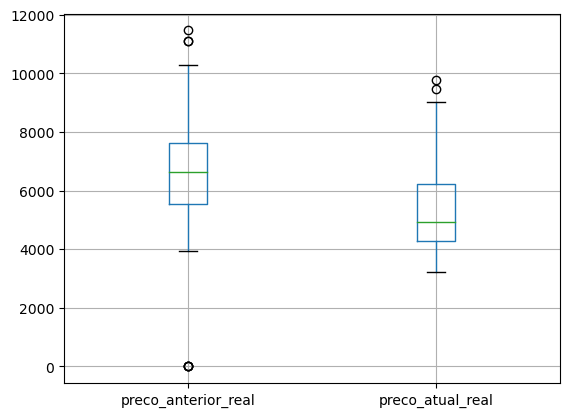

In [92]:
# Boxplot notebooks placa de video 2 GB
video_4GB = df[df['placa_de_video'] == '4 GB']
video_4GB.boxplot(['preco_anterior_real', 'preco_atual_real'])